# Convolutional Neural Network (CNN)
https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("input"))

['test.csv', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


## Import Training and Test Data

In [2]:
train_data = pd.read_csv("input/train.csv")
print("Shape of Training Data:", train_data.shape)
train_data.head()

Shape of Training Data: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("input/test.csv")
print("Shape of Test Data:", test_data.shape)
test_data.head()

Shape of Test Data: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Form Training Data

In [4]:
y_train = train_data['label']
X_train = train_data.drop(labels=['label'], axis=1)

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

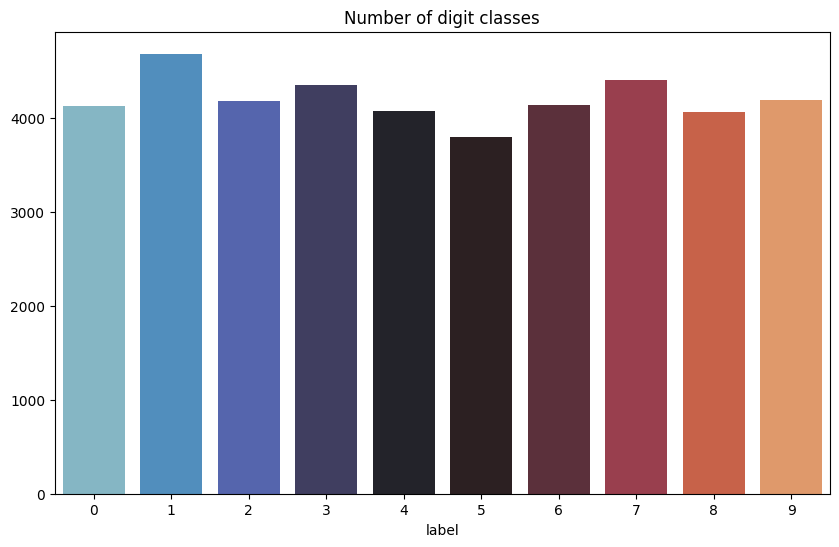

In [5]:
values = y_train.value_counts().sort_index()
plt.figure(figsize=(10, 6))
g = sns.barplot(x=values.index, y=values.values, palette="icefire")
plt.title("Number of digit classes")
values

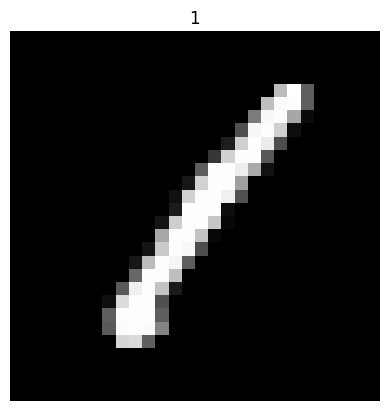

In [6]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28, 28))
plt.imshow(img, cmap='gray')
plt.title(train_data.iloc[0, 0])
plt.axis("off")
plt.show()

### Normalization, Reshape, and Encoding

In [7]:
# Normalization - grayscale normalization
X_train = X_train / 255.0
test_data = test_data / 255.0

print("Shape of X_train:", X_train.shape)
print("Shape of Test Data:", test_data.shape)

Shape of X_train: (42000, 784)
Shape of Test Data: (28000, 784)


In [8]:
# Reshape - from (28x28) to (28x28x1) 3D matrices
X_train = X_train.values.reshape(-1, 28, 28, 1)
test_data = test_data.values.reshape(-1, 28, 28, 1)

print("Shape of X_train:", X_train.shape)
print("Shape of Test Data:", test_data.shape)

Shape of X_train: (42000, 28, 28, 1)
Shape of Test Data: (28000, 28, 28, 1)


In [9]:
# Labe Encoding - one-hot encoding
# from torch.nn.functional import one_hot
# from keras.utils.np_utils import to_categorical
y_train = np.asarray(y_train, dtype="int")
# y_train = to_categorical(y_train, num_classes=10)
y_train = np.eye(10)[y_train]

### Split Data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (37800, 28, 28, 1)
Shape of X_val: (4200, 28, 28, 1)
Shape of y_train: (37800, 10)
Shape of y_val: (4200, 10)


## CNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam

model = Sequential()

# First conv layer
model.add(Conv2D(8, kernel_size=(5,5), padding="same", activation="relu", input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second conv layer
model.add(Conv2D(16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Fully-connected NN
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Optimizer and compile
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

2025-10-05 13:52:12.042066: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-10-05 13:52:12.042093: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-10-05 13:52:12.042097: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-10-05 13:52:12.042115: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-05 13:52:12.042123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,             # set input mean to 0 over the dataset
    samplewise_center=False,              # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,   # divide each input by its std
    zca_whitening=False,                  # dimesion reduction
    rotation_range=5,                     # randomly rotate images in the range 5 degrees
    zoom_range = 0.1,                     # Randomly zoom image 10%
    width_shift_range=0.1,                # randomly shift images horizontally 10%
    height_shift_range=0.1,               # randomly shift images vertically 10%
    horizontal_flip=False,                # randomly flip images
    vertical_flip=False                   # randomly flip images
)

datagen.fit(X_train)

In [13]:
# train the model
epochs = 10
batch_size = 250

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data = (X_val, y_val),
    epochs=epochs,
    steps_per_epoch=X_train.shape[0] // batch_size
)

Epoch 1/10


2025-10-05 13:52:12.520003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


151/151 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.6041 - loss: 1.1737 - val_accuracy: 0.9433 - val_loss: 0.2123
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7480 - loss: 0.6723 - val_accuracy: 0.9407 - val_loss: 0.2131
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8178 - loss: 0.6080 - val_accuracy: 0.9602 - val_loss: 0.1383
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7840 - loss: 0.8179 - val_accuracy: 0.9602 - val_loss: 0.1343
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8226 - loss: 0.7722 - val_accuracy: 0.9593 - val_loss: 0.1706
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7960 - loss: 1.2481 - val_accuracy: 0.9557 - val_loss: 0.1880
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8011 - loss: 1.3327 - val_accuracy: 0.9552 - val_loss: 0.2793
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8160 - loss: 1.2882 - val_accuracy: 0.9524 - 

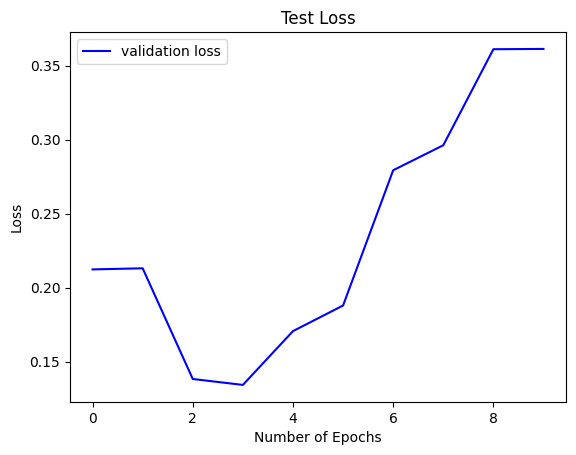

In [14]:
# plot loss history
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
predictions = model.predict(X_val)
y_pred = np.argmax(predictions, axis=1) 
y_true = np.argmax(y_val, axis=1) 
accuracy = np.mean(y_pred == y_true) * 100
print("Validation Accuracy:", accuracy)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation Accuracy: 95.5
